In [1]:
import pandas as pd
import numpy as np
import random
import time
import csv
import re
# tree model reuse

from sklearn.tree import plot_tree
import _pickle as pickle
from mvdts.dt_common.prediction import print_model, print_tree

In [7]:
df = pd.read_csv("results.csv")
name = df.pkl_location_name[40]
loaded_model = pickle.load(open(name, 'rb'))

In [8]:
len(df)

244

In [6]:
df.head(200)

,dataset,filename,k_fold,d2v_vec_size,algorithm,epochs,min_leaf_point,feature_size,d2v_shape,run,...,confusion_matrix,max_depth,inner_node,leaf_node,all_node,train_true_predict,test_true_predict,branch_sizes,training_time,pkl_location_name
0,20ng_CG_RM,"['30D_20ng_CG_RM_k1_train.csv', '30D_20ng_CG_R...",1,30,lr_mvdt,50.0,5.0,2.0,[[984 30]\n [985 30]],0.0,...,[[[377 110]\n [ 87 410]]\n\n [[350 136]\n [ ...,1.0,1.0,3.0,4.0,"[[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,...","[[1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,...","[0, 1]",0.047012,data/20ng_CG_RM/k1/final/30D_20ng_CG_RM_k1_tra...
1,20ng_CG_RM,"['30D_20ng_CG_RM_k1_train.csv', '30D_20ng_CG_R...",1,30,lr_mvdt,50.0,5.0,2.0,[[984 30]\n [985 30]],1.0,...,[[[397 90]\n [131 366]]\n\n [[402 84]\n [1...,8.0,15.0,17.0,32.0,"[[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,...","[[1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,...","[12, 3]",0.135036,data/20ng_CG_RM/k1/final/30D_20ng_CG_RM_k1_tra...
2,20ng_CG_RM,"['30D_20ng_CG_RM_k1_train.csv', '30D_20ng_CG_R...",1,30,lr_mvdt,50.0,5.0,2.0,[[984 30]\n [985 30]],2.0,...,[[[336 151]\n [129 368]]\n\n [[297 189]\n [1...,19.0,46.0,48.0,94.0,"[[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,...","[[1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,...","[7, 39]",0.263063,data/20ng_CG_RM/k1/final/30D_20ng_CG_RM_k1_tra...
3,20ng_CG_RM,"['30D_20ng_CG_RM_k1_train.csv', '30D_20ng_CG_R...",1,30,lr_mvdt,50.0,5.0,2.0,[[984 30]\n [985 30]],3.0,...,[[[380 107]\n [122 375]]\n\n [[369 117]\n [1...,8.0,25.0,27.0,52.0,"[[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,...","[[1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,...","[11, 14]",0.132037,data/20ng_CG_RM/k1/final/30D_20ng_CG_RM_k1_tra...
4,20ng_CG_RM,"['30D_20ng_CG_RM_k1_train.csv', '30D_20ng_CG_R...",1,30,lr_mvdt,50.0,5.0,2.0,[[984 30]\n [985 30]],4.0,...,[[[376 111]\n [123 374]]\n\n [[352 134]\n [1...,9.0,39.0,41.0,80.0,"[[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,...","[[1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,...","[19, 20]",0.188146,data/20ng_CG_RM/k1/final/30D_20ng_CG_RM_k1_tra...
5,20ng_CG_RM,"['30D_20ng_CG_RM_k1_train.csv', '30D_20ng_CG_R...",1,30,lr_mvdt,50.0,5.0,2.0,[[984 30]\n [985 30]],5.0,...,[[[376 111]\n [ 91 406]]\n\n [[363 123]\n [1...,10.0,34.0,36.0,70.0,"[[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,...","[[1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,...","[16, 18]",0.198979,data/20ng_CG_RM/k1/final/30D_20ng_CG_RM_k1_tra...
6,20ng_CG_RM,"['30D_20ng_CG_RM_k1_train.csv', '30D_20ng_CG_R...",1,30,lr_mvdt,50.0,5.0,2.0,[[984 30]\n [985 30]],6.0,...,[[[399 88]\n [151 346]]\n\n [[359 127]\n [1...,8.0,20.0,22.0,42.0,"[[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,...","[[1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,...","[7, 13]",0.142051,data/20ng_CG_RM/k1/final/30D_20ng_CG_RM_k1_tra...
7,20ng_CG_RM,"['30D_20ng_CG_RM_k1_train.csv', '30D_20ng_CG_R...",1,30,lr_mvdt,50.0,5.0,2.0,[[984 30]\n [985 30]],7.0,...,[[[342 145]\n [127 370]]\n\n [[295 191]\n [1...,8.0,21.0,23.0,44.0,"[[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,...","[[1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,...","[6, 15]",0.153037,data/20ng_CG_RM/k1/final/30D_20ng_CG_RM_k1_tra...
8,20ng_CG_RM,"['30D_20ng_CG_RM_k1_train.csv', '30D_20ng_CG_R...",1,30,lr_mvdt,50.0,5.0,2.0,[[984 30]\n [985 30]],8.0,...,[[[418 69]\n [201 296]]\n\n [[411 75]\n [2...,10.0,24.0,26.0,50.0,"[[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,...","[[1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,...","[17, 7]",0.137129,data/20ng_CG_RM/k1/final/30D_20ng_CG_RM_k1_tra...
9,20ng_CG_RM,"['30D_20ng_CG_RM_k1_train.csv', '30D_20ng_CG_R...",1,30,lr_mvdt,50.0,5.0,2.0,[[984 30]\n [985 30]],9.0,...,[[[410 77]\n [142 355]]\n\n [[399 87]\n [1...,14.0,26.0,28.0,54.0,"[[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,...","[[1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,...","[20, 6]",0.188947,data/20ng_CG_RM/k1/final/30D_20ng_CG_RM_k1_tra...


In [20]:
df.algorithm[55]

'rs_mvdt'

In [26]:
print_tree(loaded_model)

0
Left Branch [448, 293]
  1
  Left Branch [226, 66]
    2
    Left Branch [187, 35]
      3
      Left Branch [88, 4]
        Predict {1: 88, 0: 4}
      Right Branch [99, 31]
        4
        Left Branch [99, 29]
          5
          Left Branch [31, 1]
            Predict {1: 31, 0: 1}
          Right Branch [68, 28]
            6
            Left Branch [45, 8]
              7
              Left Branch [23, 1]
                Predict {1: 23, 0: 1}
              Right Branch [22, 7]
                8
                Left Branch [8, 6]
                  9
                  Left Branch [2, 0]
                    Predict {1: 2}
                  Right Branch [6, 6]
                    10
                    Left Branch [6, 3]
                      Predict {1: 6, 0: 3}
                    Right Branch [0, 3]
                      Predict {0: 3}
                Right Branch [14, 1]
                  Predict {1: 14, 0: 1}
            Right Branch [23, 20]
              7
              L

In [16]:
len(n_nodes)

77

In [8]:
len(n_nodes)
max_depth

20

In [18]:
n_nodes, max_depth, leaf_nodes = print_model(loaded_model)

depth: 0[ 0.65327463  0.56108999 -0.7186788   0.22722759  0.58160102  0.37100714
 -0.41545588 -0.0468055   0.26131651 -0.83158551  0.43662629 -0.36436127
 -0.14156769  0.7930124  -0.29069713 -0.23981425 -0.34268299  0.63789334
 -0.18104052  0.06911523 -0.21772489 -0.54209447 -0.74174251  1.16222568
 -0.67530332  0.06782963 -0.63911417  0.10439367  0.42476843  0.07993217
 -0.2944287 ]0.9998197759597252
Left Branch [385, 82]
-->depth: 1[ 0.33538682  0.64131946 -0.39529908 -0.0061564   0.46555875 -0.00448154
 -0.2687173  -0.29220602  0.03983374 -0.53257675  0.38741115 -0.19196122
 -0.22668335  0.4765674  -0.04379445  0.03211025 -0.23583775  0.39840188
 -0.15207968  0.18815333  0.0162934  -0.0421468  -0.60167077  1.18614975
 -0.32738391  0.35672439 -0.41973447 -0.13408242  0.3906016   0.15150541
  0.47102581]0.1373330010343276
-->Left Branch [383, 75]
-->-->depth: 2[ 0.33215947  0.71190374 -0.43214395  0.02233389  0.34203165  0.00882665
 -0.22233143 -0.2166934   0.05508184 -0.43416295  0.3

In [19]:
l,r,idx=tree_left_right_sizee(n_nodes)

[list([array([473, 476]), 0]) list([array([448, 293]), 1, 'l'])
 list([array([226,  66]), 2]) list([array([187,  35]), 3])
 list([array([99, 31]), 4]) list([array([99, 29]), 5])
 list([array([68, 28]), 6]) list([array([45,  8]), 7])
 list([array([22,  7]), 8]) list([array([8, 6]), 9])
 list([array([6, 6]), 10]) list([array([23, 20]), 7])
 list([array([15,  7]), 8]) list([array([ 8, 13]), 8])
 list([array([ 8, 10]), 9]) list([array([ 6, 10]), 10])
 list([array([39, 31]), 3]) list([array([31, 31]), 4])
 list([array([17,  7]), 5]) list([array([14, 24]), 5])
 list([array([14, 21]), 6]) list([array([13, 14]), 7])
 list([array([11, 14]), 8]) list([array([10,  8]), 9])
 list([array([222, 227]), 2]) list([array([51, 18]), 3])
 list([array([51, 14]), 4]) list([array([7, 9]), 5])
 list([array([171, 209]), 3]) list([array([170, 194]), 4])
 list([array([95, 64]), 5]) list([array([77, 61]), 6])
 list([array([77, 54]), 7]) list([array([70, 54]), 8])
 list([array([66, 44]), 9]) list([array([62, 44]),

In [ ]:
print(n_nodes[1:idx[1][0]])
print(n_nodes[idx[1][0]:])

In [4]:
def tree_left_right_sizee(inner_nodes):
    # getting all inner nodes from left and right branch
    idx = []
    print(inner_nodes)
    for i, v in enumerate(inner_nodes):
        # getting 1 1 initial depth
        # if index 1 find out which branch is it left or right
        # if first index is 1 then left else right
        if v[1] == 1:
            idx.append([i, v[2]])
    print(idx)
    # check root node has decision node then put 0 and count inner_nodes-1 for right side
    # left skew [[1, 'l']], right skew [[1, 'r']]
    if len(idx) == 1:
        # pure left is skew
        if idx[0][1] == 'l':
            print("l: ", idx[0], idx[0][1])
            left = len(inner_nodes)-1
            right = 0
        # pure right is skew
        elif idx[0][1] == 'r':
            print("r: ", idx[0], idx[0][1])
            left = 0
            right = len(inner_nodes) - 1
        # nothing there
        else:
            left = 0
            right = 0
    elif len(idx) == 2:
        # use second position depth to separate data, with ndarray
        # eg [[1, 'l'], [9, 'r']]
        print("2", idx, len(idx))
        left = len(inner_nodes[1:idx[1][0]])
        right = len(inner_nodes[idx[1][0]:])
    elif len(idx) == 0:
        print("0", idx, len(idx))
        left = 0
        right = 0
    else:
        left = 0
        right = 0
    return left, right, idx

In [746]:
tree_balance_depth(loaded_model, 3, root_node=[], leaf_node=[])

-->depth: 1 entropy: 0.9794116346561963
-->Left Branch [150, 58]
-->-->depth: 2 entropy: 0.9989326546260581
-->-->Left Branch [61, 47]
-->-->-->depth: 3 entropy: 0.5032583347756457
-->-->-->Left Branch [12, 0]
-->-->-->-->Predict {1: 12}
-->-->-->Right Branch [49, 47]
-->-->Right Branch [89, 11]
-->-->-->depth: 3 entropy: 0.934068055375491
-->-->-->Left Branch [55, 10]
-->-->-->Right Branch [34, 1]
-->-->-->-->Predict {1: 34, 0: 1}
-->Right Branch [79, 69]
-->-->depth: 2 entropy: 0.9809470132751208
-->-->Left Branch [33, 53]
-->-->-->depth: 3 entropy: 0.693127415328288
-->-->-->Left Branch [32, 38]
-->-->-->Right Branch [1, 15]
-->-->-->-->Predict {0: 15, 1: 1}
-->-->Right Branch [46, 16]
-->-->-->depth: 3 entropy: 0.7088356733321961
-->-->-->Left Branch [11, 1]
-->-->-->-->Predict {1: 11, 0: 1}
-->-->-->Right Branch [35, 15]
-->depth: 1 entropy: 0.6307475547129667
-->Left Branch [21, 73]
-->-->depth: 2 entropy: 0.7467366074830679
-->-->Left Branch [10, 10]
-->-->-->depth: 3 entropy: 0

(array([[array([471, 478]), 0],
        [array([229, 127]), 1],
        [array([150,  58]), 2],
        [array([61, 47]), 3],
        [array([89, 11]), 3],
        [array([79, 69]), 2],
        [array([33, 53]), 3],
        [array([46, 16]), 3],
        [array([242, 351]), 1],
        [array([21, 73]), 2],
        [array([10, 10]), 3],
        [array([11, 63]), 3],
        [array([221, 278]), 2],
        [array([185, 188]), 3],
        [array([36, 90]), 3]], dtype=object),
 3,
 [array([{1: 12}], dtype=object),
  array([{1: 34, 0: 1}], dtype=object),
  array([{0: 15, 1: 1}], dtype=object),
  array([{1: 11, 0: 1}], dtype=object),
  array([{1: 8, 0: 3}], dtype=object),
  array([{0: 7, 1: 2}], dtype=object),
  array([{1: 1}], dtype=object)])

In [428]:
def tree_balance_depth_(node, depth, indentation="", root_node=[], leaf_node=[]):
    # if the node object is of leaf type
    if isinstance(node, Leaf):
        leaf_node.append(np.array([node.predictions]))        
    else:
        if depth >= int(node.depth):             
            sum = np.add(np.array(node.true_purity), np.array(node.false_purity))
            root_node.append([sum, node.depth])
            print_model_depth(node.true_branch, depth, indentation + "-->", root_node, leaf_node)
            print_model_depth(node.false_branch, depth, indentation + "-->", root_node, leaf_node)
        return np.array(root_node), find_depth(root_node), leaf_node

In [433]:
ins

array([[array([471, 478]), 0],
       [array([115,  14]), 1],
       [array([111,   6]), 2],
       [array([356, 464]), 1],
       [array([183, 118]), 2],
       [array([134,  42]), 3],
       [array([49, 76]), 3],
       [array([173, 346]), 2],
       [array([154, 223]), 3],
       [array([ 19, 123]), 3]], dtype=object)

In [655]:
def count_lr_inner_node(inner_nodes, left=[], right=[]):
# root node is not counted    
    initial = 1
    c = 0
        
    for i in inner_nodes[1:]:        
        c += 1        
        if c == i[1]:        
            left.append(i)            
            if initial == i[1]:
                c = 
                right.append(i)                                 

    return left, right

In [ ]:
for i, v in enumerate(ins):        
    if v[1] == 1:
        print(i)

In [656]:
look continue increment or greater but if separation using 1 depth if only applicable for full tree
get index of both 1  1 depth
then count branch

SyntaxError: invalid syntax (<ipython-input-656-6ae9da63f8e5>, line 1)

In [895]:
l = [1,2,3,4]

In [898]:
l[1:]

[2, 3, 4]

In [893]:
def tree_left_right_size(ins):
    idx = []
    for i, v in enumerate(ins):    

        if v[1] == 1:
            idx.append(i)
            
    left = ins[1:][:idx[1]]
    right = ins[idx[1]:]
    return left, right

In [894]:
left, right = tree_left_right_size(ins)
print(len(left), len(right))

2 1


In [842]:
len(ins)

28

In [709]:
204, 172, 267, 306
left

array([[array([267, 306]), 1],
       [array([165,  88]), 2],
       [array([121,  48]), 3],
       [array([105,  33]), 4],
       [array([99, 25]), 5],
       [array([39, 20]), 6],
       [array([32, 10]), 7],
       [array([17, 10]), 8],
       [array([11,  9]), 9],
       [array([ 7, 10]), 7],
       [array([6, 8]), 5],
       [array([16, 15]), 4],
       [array([16, 11]), 5],
       [array([44, 40]), 3],
       [array([33,  7]), 4],
       [array([11,  6]), 5],
       [array([6, 6]), 6],
       [array([11, 33]), 4],
       [array([ 9, 10]), 5],
       [array([ 7, 10]), 6],
       [array([7, 6]), 7],
       [array([102, 218]), 2],
       [array([ 91, 213]), 3],
       [array([15, 66]), 4],
       [array([12, 63]), 5],
       [array([10, 26]), 6],
       [array([ 9, 12]), 7],
       [array([ 76, 147]), 4],
       [array([ 76, 123]), 5],
       [array([64, 91]), 6],
       [array([30, 12]), 7],
       [array([34, 79]), 7],
       [array([28, 48]), 8],
       [array([22, 29]), 9],
    

In [657]:
left_inner, right_inner = count_lr_inner_node(ins)

In [850]:
lds

[array([{0: 46, 1: 259}], dtype=object),
 array([{1: 1}], dtype=object),
 array([{1: 3, 0: 4}], dtype=object),
 array([{0: 1, 1: 1}], dtype=object),
 array([{0: 21, 1: 10}], dtype=object),
 array([{0: 4, 1: 1}], dtype=object),
 array([{0: 3, 1: 6}], dtype=object),
 array([{0: 83, 1: 29}], dtype=object),
 array([{0: 4, 1: 1}], dtype=object),
 array([{1: 1, 0: 3}], dtype=object),
 array([{1: 7, 0: 4}], dtype=object),
 array([{0: 34, 1: 16}], dtype=object),
 array([{1: 4, 0: 3}], dtype=object),
 array([{0: 9, 1: 4}], dtype=object),
 array([{0: 6, 1: 15}], dtype=object),
 array([{0: 3, 1: 1}], dtype=object),
 array([{0: 4, 1: 1}], dtype=object),
 array([{1: 5, 0: 5}], dtype=object),
 array([{1: 6, 0: 2}], dtype=object),
 array([{0: 5}], dtype=object),
 array([{0: 4, 1: 7}], dtype=object),
 array([{0: 2, 1: 3}], dtype=object),
 array([{0: 17, 1: 5}], dtype=object),
 array([{1: 7, 0: 2}], dtype=object),
 array([{0: 7, 1: 1}], dtype=object),
 array([{1: 20, 0: 5}], dtype=object),
 array([{1: 

In [891]:
ins, md, lds = print_model_depth(loaded_model, depth=15, root_node=[], leaf_node=[])

depth: 0 entropy: 0.9991386123705139
Left Branch [468, 41]
-->depth: 1 entropy: 0.0796186595955485
-->Left Branch [467, 37]
-->-->Predict {0: 37, 1: 467}
-->Right Branch [1, 4]
-->-->Predict {0: 4, 1: 1}
Right Branch [29, 446]
-->depth: 1 entropy: 0.021753598001942133
-->Left Branch [1, 0]
-->-->Predict {1: 1}
-->Right Branch [28, 446]
-->-->Predict {0: 446, 1: 28}


In [892]:
ins, md, lds = tree_balance_depth_(loaded_model, 3, root_node=[], leaf_node=[])

-->depth: 1 entropy: 0.0796186595955485
-->Left Branch [467, 37]
-->-->Predict {0: 37, 1: 467}
-->Right Branch [1, 4]
-->-->Predict {0: 4, 1: 1}
-->depth: 1 entropy: 0.021753598001942133
-->Left Branch [1, 0]
-->-->Predict {1: 1}
-->Right Branch [28, 446]
-->-->Predict {0: 446, 1: 28}


In [301]:
def print_model_depth(node, depth, indentation="", root_node=[], leaf_node=[]):
    # if the node object is of leaf type
    if isinstance(node, Leaf):
        leaf_node.append(np.array([node.predictions]))
        print(indentation + "Predict", node.predictions)

    else:
        if depth >= int(node.depth): 
            sum = np.add(np.array(node.true_purity), np.array(node.false_purity))

            root_node.append([sum, node.depth])
            # showing depth, theta and entropy for each inner nodes
            print(indentation + "depth: " + str(node.depth)+" entropy: "+str(node.entropy))

            # call the function on true branch
            print(indentation + "Left Branch " + str(node.true_purity))
            print_model_depth(node.true_branch, depth, indentation + "-->", root_node, leaf_node)

            # on false branch
            print(indentation + "Right Branch " + str(node.false_purity))
            print_model_depth(node.false_branch, depth, indentation + "-->", root_node, leaf_node)
        return np.array(root_node), find_depth(root_node), leaf_node

In [359]:
a,b,c =print_model_depth(loaded_model,2,root_node=[], leaf_node=[])
len(c)

depth: 0 entropy: 0.9998743474242437
Left Branch [313, 186]
-->depth: 1 entropy: 0.3199212282946764
-->Left Branch [303, 167]
-->-->depth: 2 entropy: 0.7467366074830679
-->-->Left Branch [269, 101]
-->-->Right Branch [34, 66]
-->Right Branch [10, 19]
-->-->depth: 2 entropy: 0.21639693245126462
-->-->Left Branch [0, 1]
-->-->-->Predict {0: 1}
-->-->Right Branch [10, 18]
Right Branch [186, 300]
-->depth: 1 entropy: 0.471599169174903
-->Left Branch [31, 18]
-->-->depth: 2 entropy: 0.7682814090975242
-->-->Left Branch [28, 10]
-->-->Right Branch [3, 8]
-->-->-->Predict {0: 8, 1: 3}
-->Right Branch [155, 282]
-->-->depth: 2 entropy: 0.3778507290025325
-->-->Left Branch [17, 15]
-->-->Right Branch [138, 267]


2

In [206]:
# getting max depth
def find_depth(all_nodes):
    """
    finding depth of tree
    # leaf decision node count as final depth of decision node
    # we have two list 1 for root decision nodes
    # another for leaf decision node so use n_nodes[1] and check for max value
    :param n_nodes:
    :return:
    """
    depth = 0
    for i in range(len(all_nodes)):
        if np.amax(all_nodes[i][1]) > depth:
            depth = np.amax(all_nodes[i][1])
    return depth

# find probability for prediction
def predict_proba(prediction):
    total = sum({prediction[i] for i in prediction})
    result = {}
    for i, v in prediction.items():
        result[i] = v / total

    return result


In [207]:
def print_tree_depth(node, depth=1, spacing=""):
    
    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print(spacing + "Predict", node.predictions)
        return
    
    # Print the question at this node    
    print(spacing + str(node.question), str(node.depth))    
    
    if depth > int(node.depth):        
        # Call this function recursively on the true branch
        print(spacing + '--> True:')
        print_tree_depth(node.true_branch, depth, spacing + "  ")

    # Call this function recursively on the false branch
        print(spacing + '--> False:')
        print_tree_depth(node.false_branch, depth, spacing + "  ")


In [360]:
# model prediction
def classify_depth(x_point, model, depth=1):    
    if isinstance(model, Leaf):

        if len(model.predictions) >= 2:        
            pred_dict = predict_proba(model.predictions)
            max_prob = 0
            label_name = 0

            for i, v in pred_dict.items():
                if v >= max_prob:
                    max_prob = v # in case of of 50/50 choose last one
                    label_name = i
            return int(label_name)
        else:
            #print(model.predictions)            
            return next(iter(model.predictions))
    else:
        pt = np.append(x_point[model.indexes], 1)
        r = model.question.T.dot(pt)
        if depth > int(model.depth):            
            if r > 0:
                return classify_depth(x_point, model.true_branch, depth)
            else:
                return classify_depth(x_point, model.false_branch, depth)
        print("from inner node: {}".format(r))
        
        if r > 0:
            r = 1
        else:
            r = 0

        return r

In [361]:
print(train[1][65])
classify_depth(train[0][65], loaded_model, 0)

1
from inner node: -0.30927370259994036


0

In [362]:
# predict call request
def predict_depth(x, tree, depth):
    # for storing predicted values
    yh_list = []
    # if only one value is passed then direct compute else do in loop
    if len(x.shape) == 1:
        return classify_depth(x, tree, depth)
    else:
        for i, value in enumerate(x):
            yh = classify_depth(value, tree, depth)
            yh_list.append(yh)
        return yh_list

In [368]:
y_pred = predict_depth(train[0], loaded_model, 15)

In [401]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [370]:
print(accuracy_score(y_pred, train[1]))
confusion_matrix(y_pred, train[1])

0.5289778714436248


array([[335, 306],
       [141, 167]], dtype=int64)

In [373]:
from mvdts.dt_common.prediction import predict
y_dtc_pred = predict(test[0], loaded_model)

{0: 4}
{0: 2}
{0: 2}
{0: 1}
{0: 1}
{0: 2}
{0: 2}
{0: 1}
{0: 4}
{0: 1}
{0: 2}
{0: 2}
{0: 1}
{0: 1}
{0: 2}
{0: 2}


In [388]:
print(accuracy_score(test[1], y_dtc_pred))
confusion_matrix(test[1], y_dtc_pred)

0.5163329820864068


array([[330, 148],
       [311, 160]], dtype=int64)

In [387]:
df.accuracy[43]

'[0.79898477 0.75711382]'

In [356]:

#print_model(df.pkl_location_name[0])
#print_model(loaded_model)

In [546]:
def level_wise_model_info(tree, level):
    pass


In [548]:
def count_left_right_nodes_level_wise(tree, level):
    if level == all:
        #use all  levele
        pass
    pass

In [13]:
from mvdts.dt_common.nodes import DecisionNode, Leaf

def intermediate_prediction(tree, level):
    #make temp tree
    pass

def i_p(tree, level):
    # hold information and make predict like in print function
    pass

In [550]:
def finding_int(column_name, value_type="int/float"):
    #return both single and list of instance
    pass

SyntaxError: invalid syntax (<ipython-input-550-f6077e8f59da>, line 2)

In [761]:
train = df.train_true_predict[0].split("array")[1].split(",")
test = df.train_true_predict[0].split("array")[2].split(",")
len([re.findall("\d+",t) for t in test])

IndexError: list index out of range

In [509]:
re.findall("\d+", "Current Level: 13.4 db.")

['13', '4']

In [762]:
# get floating point value only
re.findall("\d+\.\d+", "Current Level: 13.4 db.")
float(re.findall("\d+\.\d+", df.accuracy[0].split(" ")[0])[0])

0.72256098

In [763]:
def read_data(dataLocation):
    """
   Reading data and returning in proper format
   :param dataLocation: location of data
   :return: set of features, labels and combine
   """
    df = pd.read_csv(dataLocation)

    X = np.array(df[df.columns[:-1]].values.tolist())
    y = np.array(df[df.columns[-1]].values.tolist())
    return [X, y]

In [764]:
train = read_data("data/20newsgroup/k1/final/30D_20newsgroup_k1_train.csv")
test = read_data("data/20newsgroup/k1/final/30D_20newsgroup_k1_test.csv")

In [772]:
ss = [1,2,3,4,5]

In [774]:
ss

[1, 2, 3, 4, 5]

In [775]:
type(ss)

list

In [776]:
type(list(train[1]))

list

In [110]:
test[0].shape

(949, 30)

In [23]:
left_0 = 0
left_1 = 0
right_0 = 2
right_1 = 1

if (left_0 == 0 and left_1 == 0) or (right_0 == 0 and right_1 == 0):
    print("leaf node")
else:
    print("inner node")

leaf node


In [3]:
from math import log2
# for calculating entropy, this can be change based on requirement
def entropy(a, b):
    # a, b must have integer number

    if a == 0:
        return 0
    elif b == 0:
        return 0
    else:
        c = a + b
        e = -(a/c) * log2(a/c) - (b/c) * log2(b/c);
        return e

In [35]:
entropy(9,12)

0.9852281360342516

In [ ]:
def dff(md)


In [34]:
l = []
len(l)

0

In [711]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = "entropy",random_state=0)
iris = load_iris()
clf = clf.fit(iris.data, iris.target)

In [716]:
print(len(clf.tree_.children_left),len(clf.tree_.children_right))

17 17


[Text(167.4, 199.32, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue 

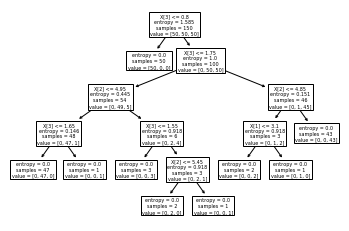

In [720]:
tree.plot_tree(clf)  # doctest: +SKIP

In [732]:
clf.tree_.children_right

array([ 2, -1, 12,  7,  6, -1, -1,  9, -1, 11, -1, -1, 16, 15, -1, -1, -1],
      dtype=int64)

In [738]:
def get_cart_model_info(model):
    all_nodes = model.tree_.node_count

    leaf_node = model.tree_.n_leaves
    inner_node = all_nodes - leaf_node
    max_depth = model.tree_.max_depth

    return inner_node, leaf_node, all_nodes, max_depth

In [739]:
get_cart_model_info(clf)

(8, 9, 17, 5)